In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.ndimage.filters import generic_filter
from scipy.ndimage.filters import uniform_filter1d
from scipy import signal
import scipy.ndimage as im
import numpy.random as rng
import csv
rng.seed(1001)


In [8]:
T = 10                     # [s]  total time
F = 0.01                   # [Hz] sampling rate

nt = int(T/F)              # samples
f  = 0.5                   # signal frequency
k  = 0.2                   # signal damping 

t = np.linspace(0,365,nt)   # time axis

In [9]:
s = np.sin(2*pi*f*t) * np.exp(-k*t)

# start with the signal
a = s.copy()

# add white noise
wn = rng.uniform(-0.2,+0.2, nt)
a += wn

# add spiky noise
ns = 51
sn = np.zeros(nt)
sn[ rng.randint(1,nt,ns) ] = rng.uniform(-5.0,+5.0,ns)
a += sn

#apply filters
medianA=signal.medfilt(a, 21)
meanA=uniform_filter1d(a,size=32)

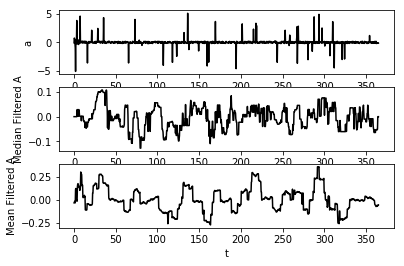

In [10]:
fig, axs=plt.subplots(3)

axs[0].plot(t,a,'k')
axs[0].set_xlabel('t') 
axs[0].set_ylabel('a') 


axs[1].plot(t,medianA,'k')
axs[1].set_xlabel('t')
axs[1].set_ylabel('Median Filtered A');
#ones=[0,0]
#meanA=np.concatenate((meanA,ones))
axs[2].plot(t,meanA,'k')
axs[2].set_xlabel('t')
axs[2].set_ylabel('Mean Filtered A');

# Assignment 

Above is sample code that creates a random set of values with certain noise and outliers

Below you will read in weather data from Denver International Airport from the WeatherData.csv file and graph the data with filters applied to exclude outliers and errors.